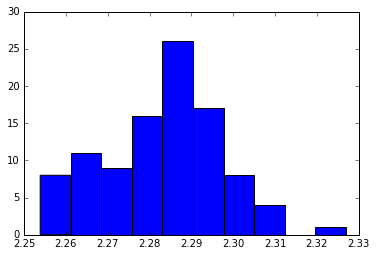

In [114]:
%matplotlib inline
from math import sin, cos, pi, atan
import csv
import matplotlib.pyplot as plt
import random

Cd = 0.17
A = 1.15
roll_resist_co = 0.0025
mass = 285 #kg
g = 9.8 #kg-m/s^2
total_charge = 100 #percentage
def power(velocity, incline):
    return power2(velocity, incline, 0)
    

def power2(velocity, incline, accel):
    force = .5 * 1.225 * Cd * A * velocity**2 + roll_resist_co*mass*g*cos(incline) + mass*g*sin(incline) + mass*accel
    power = force * velocity
    return power

def energy(velocity, terrain):
    terrain_reader = csv.reader(open(terrain))
    energy, last_distance, last_elevation = 0, 0, 0
    for row in terrain_reader:
        try: 
            d = float(row[0])
            if d == 0:
                last_elevation = float(row[1])
            else:
                p = power(velocity, atan((float(row[1]) - last_elevation)/(float(row[0])-last_distance))) #calculates elevation angle
                time = (float(row[0]) - last_distance)/velocity
                if p * time > 0:
                    energy += p * (time)
                last_elevation = float(row[1])  
                last_distance = float(row[0])
        except ValueError:
            continue
    return energy/3600000 #converts to kW/hr


def energy_sim(velocity_range, terrain):
    energy = []
    for i in range(100):
        terrain_reader = csv.reader(open(terrain))
        e, last_distance, last_elevation = 0, 0, 0
        for row in terrain_reader:
            try: 
                d = float(row[0])
                if d == 0:
                    last_elevation = float(row[1])
                else:
                    p = power(random.choice(velocity_range), atan((float(row[1]) - last_elevation)/(float(row[0])-last_distance))) #calculates elevation angle
                    time = (float(row[0]) - last_distance)/random.choice(velocity_range)
                    if p * time > 0:
                        e += p * (time) #increments energy by power used during time period
                    last_elevation = float(row[1])  
                    last_distance = float(row[0])
            except ValueError:
                continue
        energy.append(e/3600000) #converts to kW/hr
    return energy

def state_of_charge(velocity, incline, time)
    global total_charge
    total_charge -= power(velocity, incline)*time
    return total_charge

def instantaneous_power_data(velocity, terrain):
    distance_list = []
    power_list = []
    total_distance = 0
    terrain_reader = csv.reader(open(terrain))
    p, last_distance, last_elevation = 0, 0, 0
    for row in terrain_reader:
        try: 
            d = float(row[0])
            if d == 0:
                last_elevation = float(row[1])
            else:
                p = power(random.choice(velocity), atan((float(row[1]) - last_elevation)/(float(row[0])-last_distance))) #calculates power
                total_distance += (float(row[0]) - last_distance)
                last_elevation = float(row[1])  
                last_distance = float(row[0])
                distance_list.append(total_distance)
                power_list.append(p)
            except ValueError:
                continue
    return distance_list, power_list #returns a list of distance travelled vs power used at particular distance; correlated by index

def plot_instantaneous_power(velocity, terrain):
    distance, power = instantaneous_power(velocity, terrain)
    plt.plot(distance, power) #displays a graph


def run_energy_sim(range,terrain_file):
    x = energy_sim(range, terrain_file)   
    plt.hist(x)

def plot_energy(range, terrain_file):
    energies = []
    energies2 = []
    vs = []
    for v in range:
        vs.append(v)
        energies.append(energy(v, terrain_file))
    plt.plot(vs, energies)
